In [6]:
class Room:
    """
    Responsibilities:
    - width
    - height
    - keeps track of what squares are clean
    """
    def __init__(self, width, height):
        self.width = width
        self.height = height
        self.cleaned_squares = []
        
    @property
    def total_squares(self):
        return self.width * self.height
    
    @property
    def total_clean_squares(self):
        return len(self.cleaned_squares)
    
    @property
    def total_percent_clean(self):
        return self.total_clean_squares / self.total_squares
    
    def clean_square(self, x, y):
        if (x, y) not in self.cleaned_squares:
            self.cleaned_squares.append((x, y))


In [7]:
import random


class Roomba:
    """
    Responsibilities:
    - location
    - know how it can translate
    - respond to hitting a wall
    """
    def __init__(self, room):
        self.room = room
        self.place_roomba()
        
    def place_roomba(self):
        width = self.room.width
        height = self.room.height
        random_x = random.randint(0, width)
        random_y = random.randint(0, height)
        self.location = (random_x, random_y)
        
    def move(self):
        room_height = self.room.height
        room_width = self.room.width
        
        up_location = (self.location[0], self.location[1] + 1)
        down_location = (self.location[0], self.location[1] - 1)
        left_location = (self.location[0] - 1, self.location[1])
        right_location = (self.location[0] + 1, self.location[1])
        next_x, next_y = random.choice(
            [up_location, down_location, left_location, right_location])
        
        if next_y <= room_height and next_y >= 1 and next_x <= room_width and next_x >= 1:
            self.location = (next_x, next_y)
        self.clean_current_square()
        
    def clean_current_square(self):
        self.room.clean_square(*self.location)

In [8]:
room = Room(20, 20)

roomba = Roomba(room)

counter = 0
interval_list = []
fifty_check = False
seventy_five_check = False
ninety_five_check = False
while room.total_percent_clean < 1.0:
    if room.total_percent_clean > .5 and not fifty_check:
        interval_list.append(counter)
        fifty_check = True
        
    if room.total_percent_clean > .75 and not seventy_five_check:
        interval_list.append(counter)
        seventy_five_check = True
    
    if room.total_percent_clean > .95 and not ninety_five_check:
        interval_list.append(counter)
        ninety_five_check = True

    roomba.move()
    counter += 1
    
interval_list.append(counter)
print(counter, " moves to 100% clean")


9309  moves to 100% clean


In [9]:
interval_list


[806, 1440, 3693, 9309]

In [396]:
(5, 5) in [(4, 5), (3, 2), (5, 5)]

True

In [1]:
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

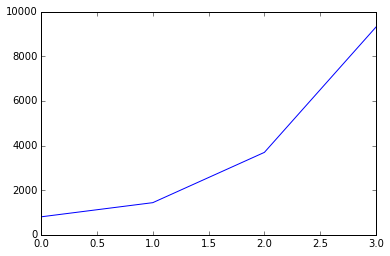

In [10]:
plt.plot(interval_list)